
# Homework 4: Confidence Intervals and Hypothesis Testing
***

**Name**: Solutions

***

This assignment is due on Canvas by **6:00PM on Friday November 5**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available in the Homework 04 assignment write-up on Canvas. To make life easier on the grader if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---


---

In [1]:
import pandas as pd
import numpy as np
from math import factorial
import matplotlib.pylab as plt
from scipy.special import binom
from scipy.stats import poisson

import scipy.stats as stats

%matplotlib inline

---

### [20 points] Problem 1 - Sea Level



You have been contacted by the nation of Bangladesh, to assess whether there is statistical evidence for sea-level rise in the Cox's Bazar area. 

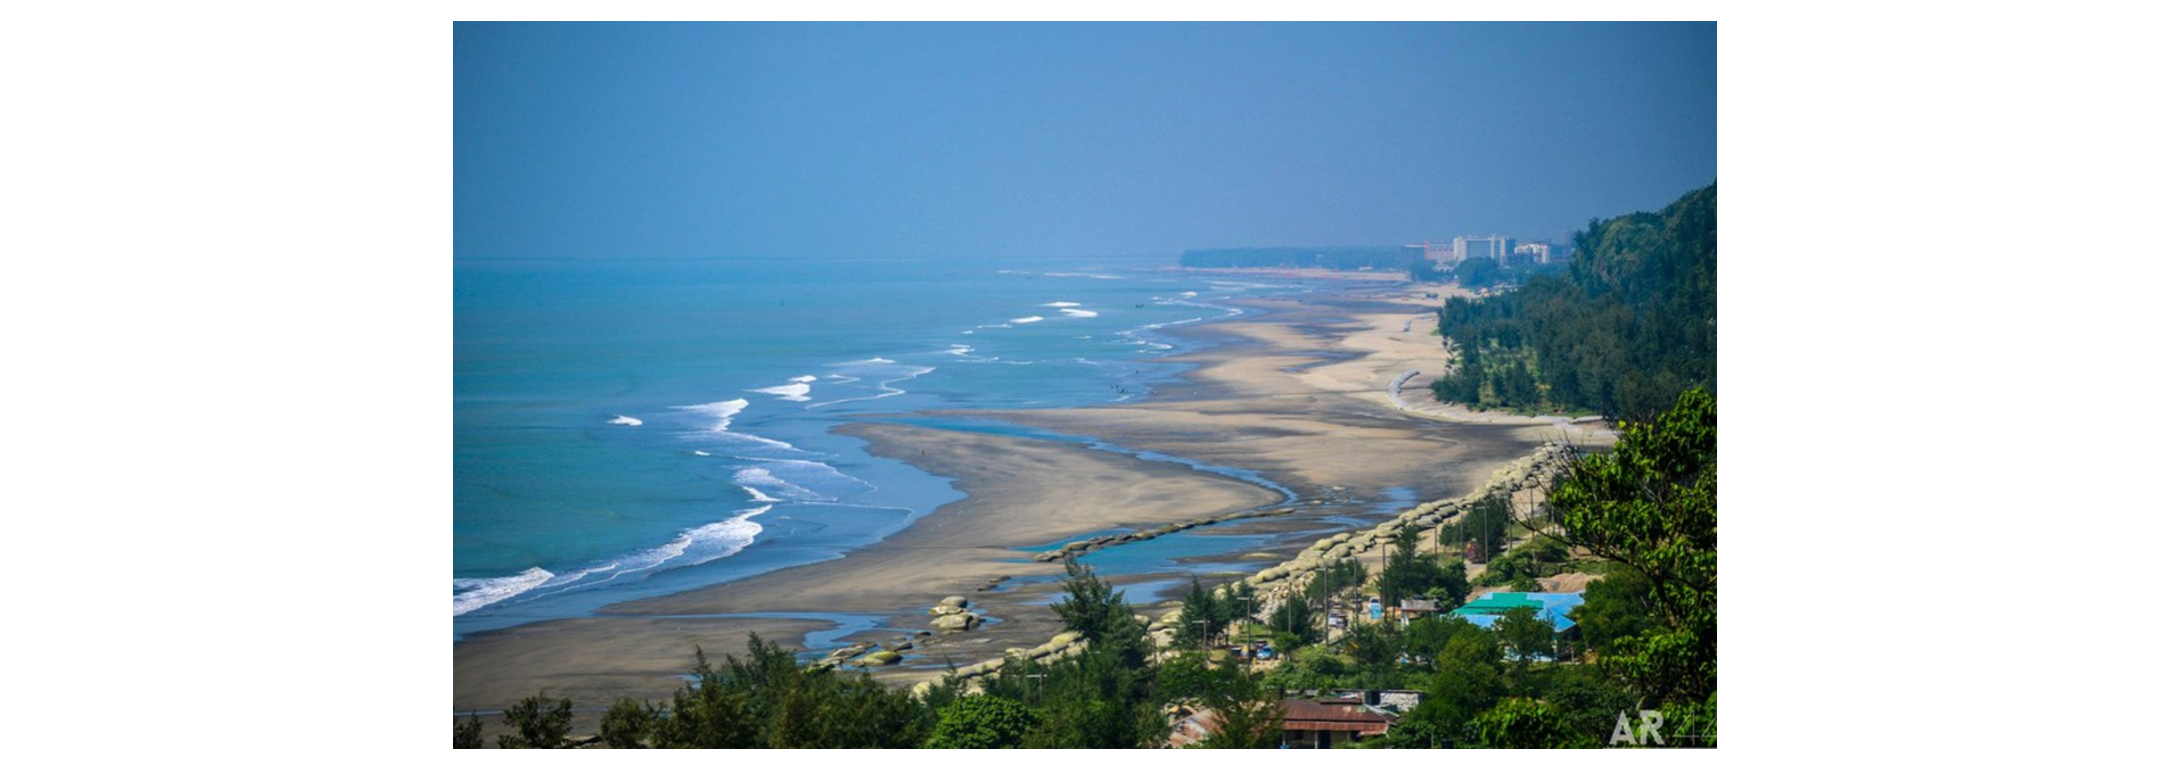

You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file for the area. This data can be found in the `CoxBazaar.csv` file that is posted on Canvas. You  may read more about the data [here](http://uhslc.soest.hawaii.edu/rqds/indian/doc/qa136a.dmt)

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save Cox's Bazar in Bangladesh from a watery fate?

**Part A:** Read in the data file. Note the lack of a header. Create a header (using python and pandas) that labels the first column 'Year', the second column 'Month', the third column 'Day', and the last column 'Sea Level'.

In [2]:
# Local and web paths to the data; pick which works for you.
file_path = "CoxBazaar.csv"


dfCB = pd.read_csv(file_path, header=None)
dfCB.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'Sea Level'}, inplace=True)
dfCB.head()

Year  Month  Day  Sea Level
0  1983      1    1       1638
1  1983      1    2       1592
2  1983      1    3       1475
3  1983      1    4       1417
4  1983      1    5       1445

**Part B:**  Write a function `clean_data` to:
1. Take in a single argument of a raw sea level data frame (e.g., `dfCB` above),
2. Determine what the fill-value used to replace missing sea level (Sea Level) data is,
3. Use the Pandas `DataFrame.dropna` method to remove all missing rows of data (use the fill-value to help do this), 
4. select only the data point on the first day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfCB` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [3]:
def clean_data(df):
    
    # your code goes here!
    
    # Solution:
    
    dfClean = df.copy()
    
    # compute fill value based on too-low values
    fillVal = dfClean.loc[dfClean["Sea Level"] < -5000, "Sea Level"].median()
    
    # replace missing data with NA
    dfClean.loc[dfClean["Sea Level"]==fillVal, "Sea Level"] = np.nan
    
    # drop missing data
    dfClean.dropna(subset=["Sea Level"], inplace=True)
    
    # grab only the 2nd day of each month
    ind_monthly = dfClean.index[dfClean["Day"]==1]
    dfClean = dfClean.loc[ind_monthly, :]

    return dfClean

dfClean = clean_data(dfCB)
dfClean.head(290)

Year  Month  Day  Sea Level
0     1983      1    1     1638.0
31    1983      2    1     1440.0
59    1983      3    1     1696.0
90    1983      4    1     1596.0
120   1983      5    1     1883.0
...    ...    ...  ...        ...
8613  2006      8    1     2341.0
8644  2006      9    1     2039.0
8674  2006     10    1     2200.0
8705  2006     11    1     2010.0
8735  2006     12    1     1868.0

[244 rows x 4 columns]

**Part C:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data includes the metadata accompanying our data set (linked in part A); if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 1 of each year that is divisible by 5 (i.e., 1980, 1985, ...), and label with that year. You may need to do additional processing in order to grab these indices. 

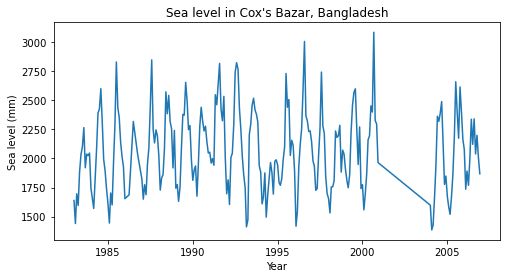

In [4]:
# Solution:

ind_labels = dfClean.index[(dfClean["Month"]==1) & (dfClean["Day"]==1) & (dfClean["Year"]%5==0)]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
dfClean["Sea Level"].plot()
ax.set_xticks(ind_labels)
ax.set_xticklabels(dfClean.loc[ind_labels, "Year"])
ax.set_xlabel('Year')
ax.set_ylabel('Sea level (mm)')
ax.set_title("Sea level in Cox's Bazar, Bangladesh");

**Part D:** If you've plotted the data correctly, you'll notice a strange negatively sloped line between the years 2001 and 2005. Explain why this occurs.

**Solution:** Data was not collected for the years 2001, 2002, and 2003. This is noted in the meta data file.

**Part E:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1980 and 1985, and
2. another object to contain the sea levels between (and including) the years 1998 and 2006. Note, since there is no data for the years 2001-2003, each of these time periods covers 6 years.

Then, create a single-panel figure that includes density histograms of each period of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the years 1980-1985 compares to the mean sea level in the years 1998-2006.

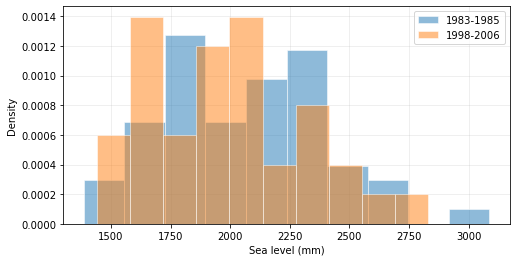

In [5]:
# Solution:

beg1 = 1980
len1 = 5
dfThen = dfClean.copy()
dfThen = dfThen.loc[(dfThen["Year"]>beg1) & (dfThen["Year"]<=(beg1+len1)), "Sea Level"]

beg2 = 1998
len2 = 8
dfNow = dfClean.copy()
dfNow = dfNow.loc[(dfNow["Year"]>beg2) & (dfNow["Year"]<=(beg2+len2)), "Sea Level"]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
dfNow.hist(alpha=0.5, edgecolor="white", label="1983-1985", density=True)
dfThen.hist(alpha=0.5, edgecolor="white", label="1998-2006", density=True)
ax.set_xlabel('Sea level (mm)')
ax.set_ylabel('Density')
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.legend()
plt.show()

**Part F:** Compute a 95% confidence interval for each of (1) the mean sea level in the 1980-1985 time span ($\mu_{1980-1985}$) and (2) the mean sea level in the 1998-2006 time span ($\mu_{1998-2006}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1980-1985 and 1998-2006? Justify your answer. 

**Solution:**

First, a 95% confidence interval ($\alpha=0.05$) for $\mu$ looks like: $\bar{x} \pm z_{\alpha/2} \dfrac{s}{\sqrt{n}}$

So let's print out some quantities relevant to our by-hand calculation:

In [6]:
stats.norm.ppf(1-.05/2)

1.959963984540054

In [7]:
print("s:",np.sqrt(dfThen.var(ddof=1)))
print("n:",dfThen.count())
print("xbar:",dfThen.mean())
print(stats.norm.ppf(1-.05/2)*dfThen.std(ddof=1)/np.sqrt(dfThen.count()))

s: 333.33745116504144
n: 36
xbar: 1979.0277777777778
108.88823316364339


In [8]:
print("s:", np.sqrt(dfNow.var(ddof=1)))
print("n:", dfNow.count())
print("xbar:", dfNow.mean())
print(stats.norm.ppf(1-.05/2)*dfNow.std(ddof=1)/np.sqrt(dfNow.count()))

s: 349.70715109277324
n: 60
xbar: 2063.6
88.486492195884


Now then.

95% confidence interval for $\mu_{1983-1985}$ is 

$\begin{align}
  CI &= \bar{x}_{1983-1985} \pm z_{0.05/2} \dfrac{s_{1983-1985}}{\sqrt{n_{1983-1985}}} \\
     &= 1979.028 \pm 1.960 \dfrac{333.337}{\sqrt{36}} \\
     &= 1979.028 \pm 108.888 \\
     &= [1870.140, 2082.463]
\end{align}$

And a 95% confidence interval for $\mu_{1998-2006}$ is 

$\begin{align}
  CI &= \bar{x}_{1998-2006} \pm z_{0.05/2} \dfrac{s_{1998-2006}}{\sqrt{n_{1998-2006}}} \\
     &= 2063.6 \pm 1.960 \dfrac{349.707}{\sqrt{60}} \\
     &= 2063.6 \pm 88.486 \\
     &= [1975.114, 2152.086]
\end{align}$

Executing these calculations in Python, we have:

In [9]:
alp = 0.05
zcrit = stats.norm.ppf(1-alp/2)

print('1983-1985 Confidence interval:')
SE_1983 = dfThen.std(ddof=1)/np.sqrt(dfThen.count())
xbar = dfThen.mean()
CI_1983 = (xbar - zcrit*SE_1983, xbar + zcrit*SE_1983)
print("CI = [{:.3f}, {:.3f}]".format(CI_1983[0], CI_1983[1]))

print('\n1998-2006 Confidence interval:')
SE_1998 = dfNow.std(ddof=1)/np.sqrt(dfNow.count())
xbar = dfNow.mean()
CI_1998 = (xbar - zcrit*SE_1998, xbar + zcrit*SE_1998)
print("CI = [{:.3f}, {:.3f}]".format(CI_1998[0], CI_1998[1]))

1983-1985 Confidence interval:
CI = [1870.140, 2087.916]

1998-2006 Confidence interval:
CI = [1975.114, 2152.086]


The 95% confidence intervals are overlapping, so we are *tempted* to say that there is NOT sufficient evidence that there is any statistically significant difference... BUT that isn't what a confidence interval is saying!

Our confidence intervals, at the more coarse interpretation, are saying that we are 95% confident that the mean sea level in the period 1983-1985 is between about 1870 and 2088 mm, and that the mean between 1998-2006 is between about 1975 and 2152 mm.  Just because these intervals overlap does not mean the *means* are statistically indistinguishable.

**Conclusion:** this result tells us nothing about how these two means compare.

**Part G:**  Compute a 95% confidence interval for the ***difference in mean sea level*** between the 1983-1985 and the 1998-2006 time spans ($\mu_{1998-2006} - \mu_{1983-1985}$. Based on this, make a conclusion regarding your hypothesis from **Part E**, and compare to what your results in **Part F** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

**Solution**:

A 95% confidence interval for $\mu_{1998-2006} - \mu_{1980-1985}$ is given by:

$\begin{align}
  CI &= \bar{x}_{1998-2006} - \bar{x}_{1983-1985} \pm z_{0.05/2} \sqrt{\dfrac{s_{1998-2006}^2}{n_{1998-2006}} + \dfrac{s_{1983-1985}^2}{n_{1983-1985}}} \\
     &= 2063.600 - 1979.028 \pm 1.960 \sqrt{\dfrac{349.707^2}{60} + \dfrac{333.337^2}{36}} \\
     &= 84.572 \pm 140.311 \\
     &= [-55.739, 224.883]
\end{align}$

In [10]:
print('Difference in means Confidence Interval')
SE_diff = np.sqrt((dfNow.var(ddof=1)/dfNow.count()) + (dfThen.var(ddof=1)/dfThen.count()))
xbar = dfNow.mean()-dfThen.mean()
lb = xbar - zcrit*SE_diff
ub = xbar + zcrit*SE_diff
print("CI = [{:0.3f}, {:0.3f}]".format(lb,ub))

Difference in means Confidence Interval
CI = [-55.736, 224.881]


Ah! Now we are testing for the proper thing, whether or not a 95% confidence interval for the difference in means covers 0.  And it does, which suggests that at the 95% confidence level, there **is not** a statistically significant difference in the means.

**Part H:**  The confidence intervals from **Parts F** and **G** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

**Solution:**

The easiest hole to poke would be that there is a clear **trend** in the sea levels as a function of time. So, the measurements are not going to be identically distributed, since this distribution is at the very least changing mean as a function of time.

A little bit less obviously, especially without a physical science background, there is a **tidal cycle** each month (~28 days), so measurements within one month of each other are likely **not independent**, which would violate one of the key assumptions of the CLT.

---

### [20 points] Problem 2 - Hypothesis Testing



Pessimist Pete is waiting for the Buff Bus, and is rather impatient.

His friend tells him that busses arrive according to an exponential distribution with parameter $\lambda=1/8$ (busses/min) for a *mean* waiting time of 8 minutes.  Pete has been waiting for a while, and wants to prove their hypothesis wrong: he's thinking the wait is longer than that (one-tailed).\\

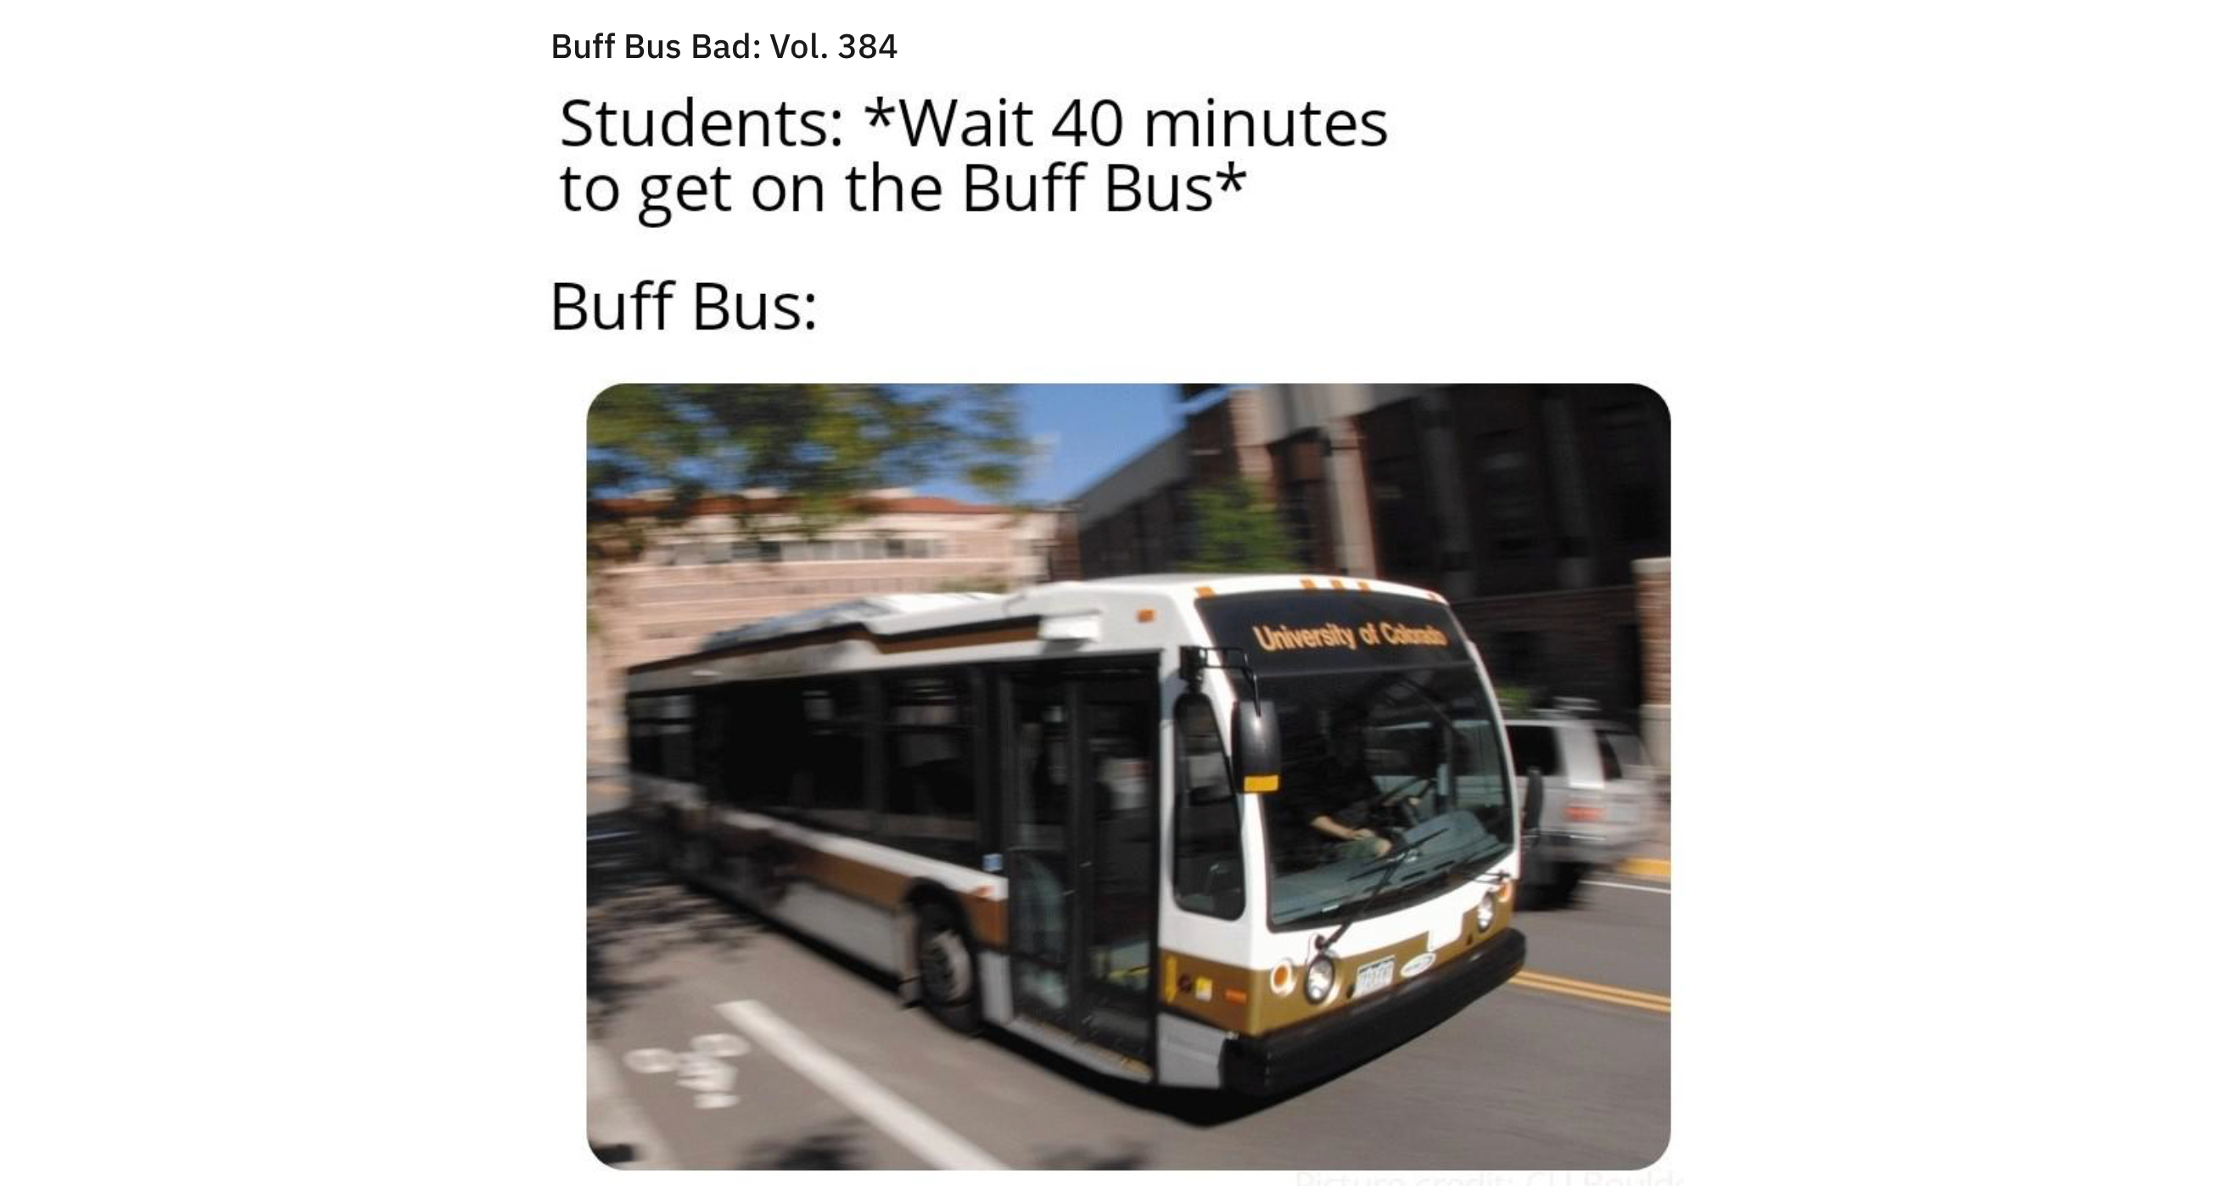
		
(Note: You may so calculations in Python if you wish, but all exposition should be in markdown.)


**Part A:** State the null and alternative hypotheses being tested.

**Solution:**

The null is $H_0:$ The mean wait time ($\frac{1}{\lambda}$) is equal to 8 minutes.

The alternative is $H_a:$ The mean wait time ($\frac{1}{\lambda}$) is more than 8 minutes.

**Part B:** Devise a critical region test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%? **Round your answer to the nearest minute.**

In [11]:
-8*np.log(.05)

23.965858188431927

**Solution:**

Using a significance level of $\alpha = 0.5$ means that we accept that we may falsely reject the null hypothesis exactly .05 proportion of the time.

This represents the probability of the exponentially-distributed bus taking a "long" time. How long?  Well, in particular, we want to solve for the amount of waiting time $c$ that satisfies:

$P(X>c)=.05$.  Equivalently, this is $1-P(X\leq c)=.05$, which we can evaluate by finding the CDF of an exponential.

The CDF of the exponential is given by $\int_0^x \lambda e^{-\lambda t} \, dt = \left(- e^{-\lambda t}\right)|^x_0= 1-e^{-\lambda x}$, so we have

$1-P(X\leq c)=.05 \implies e^{-\lambda c}=.05 \implies c= \frac{\ln .05}{-\lambda}$ 

$$c= \frac{\ln .05}{-\frac{1}{8}} = -8 \cdot \ln .05 \approx 24 \text{ minutes}$$

So we reject the null hypothesis if we're left waiting more than 24 minutes.

**Part C:** Suppose you observe a bus arrive 20 minutes after the previous bus. Again using a significance level of $\alpha = 0.05$ and your hypothesis from **Part A**, what would you conclude aboout the mean wait time?

**Solution:** Since we found that the threshold wait time is 24 minutes in **Part B** and since $20 < 24$, we would fail to reject the null hypothesis and conclude that observing a 20 minute wait time does not provide significant evidence that the mean wait time is longer than 8 minutes.

**Part D:** Now perform a **p-value hypothesis test** using a significance level of $\alpha = 0.1$. Using the same hypotheses from **Part A**, and supposing that you wait 25 minutes for the next bus to arrive, what is your conclusion?

In [12]:
np.exp(-25/8)

0.04393693362340742

**Solution:** In order to find the p-value, we must find $P(X \geq 25)$. We can again use the CDF for an exponential distribution to help us:

$$P(X \geq 25) = 1 - P(X < 25) = 1 - (1 - e^{-\lambda \cdot 25}) $$

Since we are given that $\lambda = \frac{1}{8}$, we have that:

$$ \text{p-value} = P(X \geq 25 | H_0 \  \text{is true}) = e^{-25/8} \approx 0.0439$$

Since $0.0439 < 0.1$, we would reject the null hypothesis in favor of the alternative. In other words, we have found significat evidence that the mean wait time between busses is longer than 8 minutes.

---


### [20 points] Problem 3 - Confidence Intervals - Exploring the Theory
***



The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=7$ and $\beta=1$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

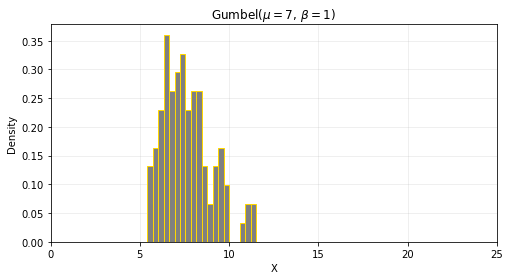

In [13]:
mu = 7
beta = 1
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
plt.hist(x, color="grey",edgecolor="gold", bins=20, density=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title(r'Gumbel($\mu=${}, $\beta=${})'.format(mu,beta))
plt.xlim([0,25])
plt.show()

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=7$ and $\beta=1$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 90% confidence interval for the mean.

In [14]:
print(np.euler_gamma)
print(x.mean())
print(stats.norm.ppf(0.95))

0.5772156649015329
7.650718890002374
1.6448536269514722


**Solution:**

If $X \sim Gum(\mu=7, \beta=1)$ then the theoretical mean and variance are:

$$E[X] = \mu+\beta \gamma = 7+1\cdot 0.5772 = 7.577$$

and 

$$\textrm{Var}(X) = \dfrac{\pi^2}{6}\beta^2 = \dfrac{\pi^2}{6}(1^2) = 1.645$$

The empirical mean from **Part A** is $\bar{X} = 7.551$, and a 90% confidence interval would be $\bar{X} \pm z_{0.1/2} \sqrt{\dfrac{\textrm{Var}(X)}{n}}$, where:
* $n=100$
* $\textrm{Var}(X)=1.645$
* $z_{0.1/2} = $ `stats.norm.ppf(0.95) `$=1.645$

This gives:

$$\begin{align}
  \textrm{CI} &= \left[7.551 - 1.645\sqrt{\dfrac{1.645}{100}}, ~~ 7.551+1.645\sqrt{\dfrac{1.645}{100}}\right]\\
              &= [7.340, ~~ 7.762] \\
\end{align}$$

In [15]:
xbar_empirical = np.mean(x)
xbar_theoretical = mu + beta*np.euler_gamma
var_empirical = np.var(x, ddof=1)
var_theoretical = (np.pi*beta)**2/6
print("Empirical mean = {:0.3f}, Theoretical mean = {:0.3f}".format(xbar_empirical, xbar_theoretical))
print("Empirical variance = {:0.3f}, Theoretical variance = {:0.3f}".format(var_empirical, var_theoretical))

Empirical mean = 7.651, Theoretical mean = 7.577
Empirical variance = 1.912, Theoretical variance = 1.645


**Part C:  A theoretical interlude.** When one of the course CAs ran his solution code for **Part B**, he obtained a 90% confidence interval of $[7.340, 7.762]$ for the mean of the $Gum(\mu=7, \beta=1)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 90% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=7, \beta=1)$ distribution, you could say there is a 90% chance that its true mean falls between 7.340 and 7.762.

**(ii)** If a class of 100 students all construct 90% confidence intervals for the mean of the $Gum(\mu=7, \beta=1)$ distribution, then we expect about 90 of their CIs to contain the true mean, and about 10 of them to miss the true mean.

**(iii)** There is a 90% probability that any given random variable sampled from $Gum(\mu=7, \beta=1)$ will be between 7.340 and 7.762.

**Solutions:**

**(i)** FALSE -- the confidence level is **not** a statement about any particular interval, and this incorrect statement is saying there is something special about the particular CI that I found.  There is not.

**(ii)** TRUE -- this is exactly the definition of a 90% confidence interval, that if you cook up a bunch of 90% confidence intervals, you expect them to actually capture the mean about 90% of the time.

**(iii)** FALSE -- confidence intervals are about sampling for the **mean** of a distribution, not any particular element from the population, and there is nothing special about the confidence interval here.  This one is doubly wrong!

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=7$ and $\beta=1$.  For each random sample, compute the 80% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

proportion covering mean: 0.808


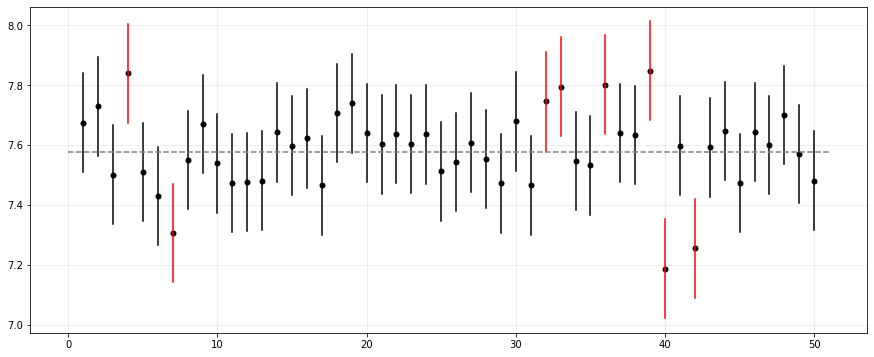

In [16]:
def confidence_intervals(m=500, n=100):
    mu = 7
    beta = 1
    EX = mu+beta*np.euler_gamma
    VX = (np.pi*beta)**2/6
    CIs = np.zeros((m,2))
    zcrit = stats.norm.ppf(1-(1-0.80)/2)
    SE = np.sqrt(VX/n)
    ctr = 0
    for ii in range(m):
        x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n)
        xbar = np.mean(x) 
        L, U = xbar - zcrit*SE, xbar + zcrit*SE
        CIs[ii,0] = L 
        CIs[ii,1] = U 
        ctr += 1 if (L <= EX) and (EX <= U) else 0 
        
    print("proportion covering mean: {:.3f}".format(ctr/m))
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,6))
    for ii, row in enumerate(np.random.choice(range(m), size=50, replace=False)):
        L, U = CIs[row,:]
        color = "black" if (L <= EX) and (EX <= U) else "red" 
        plt.plot([ii+1, ii+1], [U, L], color=color)
        plt.scatter([ii+1], (U+L)/2, s=25, color="k")
    plt.plot([0, 51], [EX, EX], color="gray", ls="--")
    ax.grid(alpha=0.25)
    
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

**Solution:**

A 80% confidence interval for the mean constructed in the above manner should cover the true mean of the population 80% of the time.  In the experiment above we see that for $m=500$ independently created confidence intervals the 80% confidence intervals covered the mean 78.2% of the time, which is pretty darn good!

### [20 points] Problem 4 - Confidence Intervals with Proportions



**Part A**: You work for an engineering firm that has been hired to construct a bridge from the Engineering Center to the Physics building. Thousands of students will walk along this bridge each day, so structural failure means injury or death for many people. 

You are in charge of quality control for the average strength of carbon fiber that will be used to construct the bridge. Thinking back fondly to your days in CSCI 3022, you set up a hypothesis test in which your alternative hypothesis is that the strength of the carbon fiber is below tolerance, and therefore unsafe. What is the null hypothesis? Would you rather have a low Type I error rate or a low Type II error rate? Explain.

**Solution:**

If our alternative hypothesis is that the carbon fiber is too weak, and therefore unsafe, then we want to err on the side of rejection. The null hypothesis must be that the structure is safe. There are lives on the line if we accidentally approve unsafe carbon fiber. Therefore, we really want to AVOID FALSE NEGATIVES. No bad stuff should get through. If we scrap some good stuff (false positives) then that's just the price we'll have to pay. 

Therefore, we would rather have a LOW TYPE II ERROR RATE.

**Part B**: Gandalf, the famous wizard data scientist, is working for the same engineering firm as you. He is a legend around the office! Word around the water cooler is that out of all of the 95% confidence intervals that Gandalf has constructed, 870 of them have turned out to actually capture the true population mean. Since Gandalf is a data science wizard and you can be sure he is constructing his confidence intervals correctly and collecting and using his data honestly, about how many 95% confidence intervals would you expect him to have constructed total? Explain your reasoning fully with words as well as some math.

**Solution:**

865 must be about 95% of however many CIs Amy has constructed total, so, letting $N$ represent her total number of CIs:
$$\dfrac{870}{N} = 0.95 ~~\rightarrow~~ N = 870/0.95 = \fbox{$915$}$$

**Part C**: In general, which is wider: a 95% confidence interval or a 99% confidence interval?

Why? Provide a brief explanation.

**Solution:**

A 99% confidence interval is wider. Remember that a 99% confidence interval will have the true mean in it 99% of the time, but a 95% confidence interval will have the true mean in it only 95% of the time. That means that the 95% confidence interval hast got to be smaller, since it misses the mean more often. This is why the goalie's hockey stick is bigger than everyone else's: when something is bigger, it's going to catch more stuff.

**Part D:** Gandalf decides to run a study on magic wands. He observes a sample of 73 black wands and find that 49 of them are in good working order. Then, he observes a sample of 58 brown wands and find that 51 of them are in good working order.

Is there statistical evidence at the 0.05 significance level that the true proportion of brown wands that are in good working order is 0.1 higher than the true proportion of black wands that are in good working order? Perform a test that computes and properly interprets a p-value.

**Solution:**

Let's start with our null and alternative hypotheses:

$$H_0 : p_\text{brown} - p_\text{black} = 0.1$$
$$H_1 : p_\text{brown} - p_\text{black} > 0.1$$

If we assume the null hypothesis (which we do when we're going to do hypothesis testing) then $p_\text{brown} - p_\text{black} = 0.1$. 

The CLT tells us that

$$ \hat{p}_\text{brown} - \hat{p}_\text{black} \sim N \left( p_\text{brown} - p_\text{black}, \frac{p_\text{brown}(1-p_\text{brown})}{n_{\text{brown}}} + \frac{p_\text{black}(1-p_\text{black})}{n_{\text{black}}}  \right) $$

Assuming $H_0$ and applying the CLT:

$$ \frac{\hat{p}_\text{brown} - \hat{p}_\text{black} - 0.1}{\sqrt{\frac{p_\text{broown}(1-p_\text{brown})}{n_{\text{brown}}} + \frac{p_\text{black}(1-p_\text{black})}{n_{\text{black}}}}} \sim Z$$

This allows us to plug in and compute our test statistic
$$ \frac{51/58 - 49/73 - 0.1}{\sqrt{\frac{51/58(1-51/58)}{58} + \frac{49/73(1-49/73)}{73}}} = z$$

In [17]:
p_brown = 51/58
p_black = 49/73
numerator = p_brown - p_black - 0.1
denominator = np.sqrt(p_brown*(1-p_brown)/58 + p_black*(1-p_black)/73)
z = numerator/denominator
print("z = {:.4f}".format(z))

z = 1.5515


We can now do our p-value test. The p-value is the probability of observing our test statistics $z = 1.5515$ or anything *more unlikely under the null hypothesis*. That would be any $z \geq 1.5515$, so our p-value is $1-CDF(z)$ (the *right tail*):

In [18]:
# p-value test
p = 1-stats.norm.cdf(z)
print("p-value = {:.4f}".format(p))

p-value = 0.0604


Since $p > 0.05$, we fail to reject the null hypothesis.

### [20 Points] Problem 5 - Hypothesis Testing - Theory 

You are working as a Data Scientist. You decide to let one of your coworkers, Bob, do some hypothesis testing for you. Unfortunately, Bob is not a master of logic and inference and so many mistakes are made throughout the day as the two of you team up to tackle some inference work. In each case, clearly explain why the hypothesis testing setup or conclusion is incorrect.

**Part A**: There is some data on the characteristics of customers that visited your company's website over the previous month.  Bob wants to perform an analysis on the proportion of last month's website visitors that bought a product. Let $X$ be the random variable describing the number of website visitors who bought a product in the previous month, and suppose that the population proportion of visitors who bought a product is $p$. Bob is interested to see if the data suggests that more than 20% of website visitors actually buy a product.  He decides to perform the test with a null hypothesis of $H_0: \hat{p} = 0.20$.

**Solution**:

The null hypothesis should include the population proportion, e.g. $H_0: p = 0.20$. A hypothesis test about the sample proportion (1) is very easy to do (just look at the sample $x/n$, with sample size $n$) and (2) tells you nothing about the population. 

**Part B**: Bob decides instead to do his hypothesis test with a null hypothesis of $H_0: p < 0.20$. 

**Solution**: 

The null hypothesis should have an equals sign and not an inequality.  The reason for this is that the null hypothesis defines the distribution that we will compare our data against.  A claim like $p < 0.20$ does not specify a particular value of $p$ that we can define our distribution by. 

**Part C**: Now Bob is finally on track with reasonable hypotheses of $H_0: p = 0.20$ and $H_1: p > 0.20$. He computes for the sample proportion a normalized test-statistic of $z = 2.4$ and states that since $z = 2.4 > 0.01$ there is insufficient statistical evidence at the $\alpha = 0.01$ significance level to conclude that the proportion of customers who buy a product is greater than 20%.

**Solution**: 

Bob is incorrectly comparing the test-statistic $z$ to the significance level $\alpha$, which makes no sense.  Instead he should compare the test-statistic to the relevant critical value $z_\alpha$.  Alternatively, he could compute a $p$-value associated with the test statistic and compare this value to the significance level. 

**Part D**: Bob is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$, and found the test-statistic $z=2.4$. He computes his p-value as:
$$\text{p-value} = \texttt{stats.norm.cdf(2.4)} = 0.9918$$

Since his p-value (0.9918) is greater than the significance level (0.01), he again claims that there is insufficient evidence at the 1% significance level to conclude that the proportion of customers who buy a product is greater than 20%.

**Solution:**

The p-value is computed incorrectly. This is a **right-tailed test**, so his p-value should be:
$$\text{p-value} = 1-\texttt{stats.norm.cdf(2.4)} = 1-0.9918 = 0.0082$$

In [19]:
print(stats.norm.cdf(2.4))
print(1-stats.norm.cdf(2.4))

0.9918024640754038
0.008197535924596155


**Part E**: Bob is again conducting the hypothesis test of $H_0: p = 0.20$ and $H_1: p > 0.20$. Suppose he computes a p-value of $0.03$, and then concludes that there is only a 3% probability that the null hypothesis is true. 

**Solution**: 

The p-value is not a probability that the null hypothesis is true or false.  The p-value represents the probability, under the null hypothesis, that we observe a test-statistic as extreme or more extreme than the one we got from the data. 